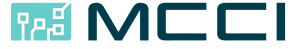

# Hello $g_m/I_D$

Run the cell below to install the course dependencies.

In [7]:
!pip install matplotlib
!pip install control
!pip install pygmid
!pip install numpy
!pip install scipy
!pip install spyder_pygmid
!pip install gdown

print("Ready to proceed!")

DEPRECATION: librecell-layout 0.0.15 has a non-standard dependency specifier scipy>=1.5.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of librecell-layout or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: librecell-lib 0.0.15 has a non-standard dependency specifier scipy>=1.5.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of librecell-lib or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a versi

In [9]:
!pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 1.7 MB/s eta 0:00:001.6 MB/s eta 0:00:01
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/home/mxmont/anaconda3/lib/python3.8/site-packages/jedi-0.17.1.dist-info/METADATA'


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [6]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.1 MB/s eta 0:00:000:00:01m eta 0:00:01
DEPRECATION: librecell-layout 0.0.15 has a non-standard dependency specifier scipy>=1.5.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of librecell-layout or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: librecell-lib 0.0.15 has a non-standard dependency specifier scipy>=1.5.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of librecell-lib or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to

# Retrieve sky130 Data

SKY130nm is a FOSS (**Free** **Open-Source** **Software**) 130nm production PDK from Google and Skywater. It's currently usable for doing test chips and initial design verification. [Read more here](https://skywater-pdk.readthedocs.io/en/main/#)

Execute the following cell to move the skywater data into your working directory.

In [5]:
#import gdown
#gpdk_data_url = "https://drive.google.com/drive/folders/10_2azNKqDd7YrzUJApqefYUArE6Qg-LI?usp=drive_link"
#gdown.download_folder(gpdk_data_url, quiet=False, use_cookies=False)
#print("Transistor data downloaded successfully!")

array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [1.37395054e-12, 5.96599469e-13, 2.77218760e-13, ...,
          8.44564614e-15, 5.45163071e-15, 3.63548271e-15],
         [2.04824609e-12, 8.95538795e-13, 4.18554365e-13, ...,
          1.30479399e-14, 8.44539117e-15, 5.64626288e-15],
         ...,
         [2.83772310e-10, 1.60795634e-10, 9.42121650e-11, ...,
          7.18820044e-12, 5.16164616e-12, 3.80155860e-12],
         [2.99874177e-10, 1.70596400e-10, 1.00337026e-10, ...,
          7.78838771e-12, 5.60374599e-12, 4.13461455e-12],
         [3.16752199e-10, 1.80908087e-10, 1.06806098e-10, ...,
          8.43470185e-12, 6.08092073e-12, 4.49484032e-12]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [2.59588540e-12, 1.15082556e-12, 5.44089031e-13, ...,
          1.77794168e-14, 1.15817515e-14, 7.79182717e-15],
        

# Setup PyGMID

Execute the next cell to ensure that you have the `sky130` transistor data available on your system.

In [2]:
from pygmid import Lookup as lk

NCH = lk('sky130nfet.mat')
PCH = lk('sky130pfet.mat')

print("Successfully loaded transistor data")

Successfully loaded transistor data


Now execute the following cell.

If successful you should see some characteristics of the `gpdk090` process (Typical-Typical corner).

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from time import time

# use interactive plots
%matplotlib notebook

# setup mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams.update({"axes.grid" : True})

VDSs = NCH['VDS']       # lookup object has pseudo-array access to data
VGSs = np.arange(0.6, 0.8, 0.05)

# Plot ID versus VDS
ID = PCH.look_up('ID', vds=VDSs, vgs=VGSs)
plt.figure()
plt.plot(VDSs, 1e6*ID.T)
plt.ylabel(r"$I_D$ [$\mu$A]")
plt.xlabel(r"$V_{DS}$ [V]")
plt.title(r'$I_D$ vs. $V_{DS}$ for varying $V_{GS}$')
plt.legend(VGSs)
plt.show()

# plot Vt against L
Ls = NCH['L']
vt = NCH.look_up('VT', vgs=0.6, L=Ls)
plt.figure()
plt.plot(Ls, vt.T)
plt.ylabel(r"$V_T$ [V]")
plt.xlabel(r"$L$ [$\mu$m]")
plt.title(r'$V_T$ vs. $L$')
plt.show()

# Plot ft against gm_id for different L
step = 0.1
gm_ids = np.arange(5, 20+step, step)
Ls = np.arange(min(NCH['L']),0.3,0.05)
s = time()
ft = NCH.look_up('GM_CGG', GM_ID=gm_ids, L =np.arange(min(Ls),0.3,0.05))/2/np.pi
e = time()
print(f"Time taken: {(e-s)*1000} [ms]")
plt.figure()
plt.plot(gm_ids, 1e-9*ft.T)
plt.ylabel(r"$f_T$ [GHz]")
plt.xlabel(r"$g_m/I_D$")
plt.title(r'$f_T$ vs. $g_m/I_D$ for varying $L$')
plt.legend(np.around(Ls, decimals=2))
plt.show()

# Plot id/w against gm_id for different L
gm_ids = np.arange(5, 20+0.1, 0.1)
step = 0.05
Ls = [0.18, 0.23, 0.28, 0.3]
id_w = NCH.look_up('ID_W', GM_ID=gm_ids, L=Ls)
plt.figure()
plt.semilogy(gm_ids, id_w.T)
plt.ylabel(r"$I_D/W$")
plt.xlabel(r"$g_m/I_D$")
plt.title(r'$I_D/W$ vs. $g_m/I_D$ for varying $L$')
plt.legend(np.around(Ls, decimals=2))
plt.show()

# Plot id/w against gm_id for different VDS (at minimum L)
gm_ids = np.arange(5, 20+0.1, 0.1)
id_w = NCH.look_up('ID_W', GM_ID=gm_ids, VDS=[0.8, 1.0, 1.2])
plt.figure()
plt.semilogy(gm_ids, id_w.T)
plt.ylabel(r"$I_D/W$")
plt.xlabel(r"$g_m/I_D$")
plt.title(r'$I_D/W$ vs. $g_m/I_D$ for varying $V_{DS}$')
plt.legend([0.8, 1.0, 1.2])
plt.show()

# Plot gm/gds against gm_id (at minimum L and default VDS)
gm_ids = np.arange(5, 20+0.1, 0.1)
gm_gds = NCH.look_up('GM_GDS', GM_ID=gm_ids)
plt.figure()
plt.semilogy(gm_ids, gm_gds.T)
plt.ylabel(r"$g_m/g_{DS}$")
plt.xlabel(r"$g_m/I_D$")
plt.title(r'$g_m/g_{DS}$ vs. $g_m/I_D$')
plt.show()

# test for utility function
gm_ID = NCH.look_up('GM_ID', VDS=np.arange(0.025, 1.2+0.025, 0.025), VSB=0.0, L=0.18)
print(gm_ID)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Time taken: 268.01037788391113 [ms]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[[30.85310065 30.84036095 30.82763208 ... 30.29034416 30.27807838
  30.26582282]
 [30.85219891 30.839458   30.8267279  ... 30.28938671 30.27711968
  30.26486287]
 [30.85088716 30.83814467 30.82541298 ... 30.28800237 30.27573372
  30.26347529]
 ...
 [ 0.69896127  0.71566352  0.73273184 ...  1.22077816  1.21972696
   1.21865223]
 [ 0.67146628  0.687534    0.70393949 ...  1.18499346  1.18401505
   1.18301229]
 [ 0.64525765  0.66073307  0.67652051 ...  1.15099221  1.15008247
   1.14914756]]


# Interactive Plots in Jupyter Notebook

To visualise a plot with live updates (cursors, sliders etc), you can use the `matplotlib notebook` backend.

In [5]:
%matplotlib notebook

# Plot gm/gds against gm_id (at minimum L and default VDS)
gm_ids = np.arange(5, 20+0.1, 0.1)
gm_gds = NCH.look_up('GM_GDS', GM_ID=gm_ids)
plt.figure()
plt.semilogy(gm_ids, gm_gds.T)
plt.ylabel(r"$g_m/g_{DS}$")
plt.xlabel(r"$g_m/I_D$")
plt.title(r'$g_m/g_{DS}$ vs. $g_m/I_D$')
plt.show()

<IPython.core.display.Javascript object>